<a href="https://colab.research.google.com/github/audreychela/Audrey_first_repo/blob/main/Ridge%2C_Lasso%2C%24elastic_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error

In [ ]:
def generate_data(num_samples=1000):
    """
    Generates synthetic data with a polynomial relationship and added noise.
    """
    np.random.seed(42)
    X = np.linspace(-3, 3, num_samples).reshape(-1, 1)
    y = 0.5 * X**2 + X + 2 + np.random.randn(num_samples, 1) * 1.5
    return X, y

In [ ]:
# 2. Prepare the data
X, y = generate_data()
X_train, X_test = X[:800], X[800:]
y_train, y_test = y[:800], y[800:]
X_train.shape

(800, 1)

In [ ]:
# 3. Explicitly transform the features
# We first create an instance of PolynomialFeatures.
poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [ ]:
# 4. Standardize the data
# It's crucial to standardize the data before applying regularization,
# especially with polynomial features, to ensure all features are
# on a similar scale and the penalty is applied fairly.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

# Ridge Model (L2)

In [ ]:
# 5. Train both models
# Standard Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_scaled, y_train)

# Ridge Regression
# Note: The 'alpha' parameter controls the regularization strength.
ridge_reg_model = Ridge(alpha=1.0)
ridge_reg_model.fit(X_train_scaled, y_train)

Ridge()

In [ ]:
?Ridge

In [ ]:
# 6. Make predictions and evaluate performance
y_linear_pred = linear_reg_model.predict(X_test_scaled)
y_ridge_pred = ridge_reg_model.predict(X_test_scaled)

linear_mse = mean_squared_error(y_test, y_linear_pred)
ridge_mse = mean_squared_error(y_test, y_ridge_pred)

#check mse
print("Standard Linear Regression MSE: {:.2f}".format(linear_mse))
print("Lasso Regression MSE: {:.2f}".format(ridge_mse))
print("-" * 50)

Standard Linear Regression MSE: 78972.50
Lasso Regression MSE: 5.86
--------------------------------------------------


In [ ]:
# 7. Compare coefficients
print("Coefficients from Standard Linear Regression:")
print(np.round(linear_reg_model.coef_, 2))
print("-" * 50)
print("\nCoefficients from Ridge Regression (shrunken toward zero):")
print(np.round(ridge_reg_model.coef_, 2))


Coefficients from Standard Linear Regression:
[[   1.49    4.44   -1.    -31.24  -12.3   104.25   91.53  -97.25 -144.65
   -45.27]]
--------------------------------------------------

Coefficients from Ridge Regression (shrunken toward zero):
[ 1.27  1.32  0.05  0.14  0.24 -0.11  0.31 -0.11 -0.03  0.41]


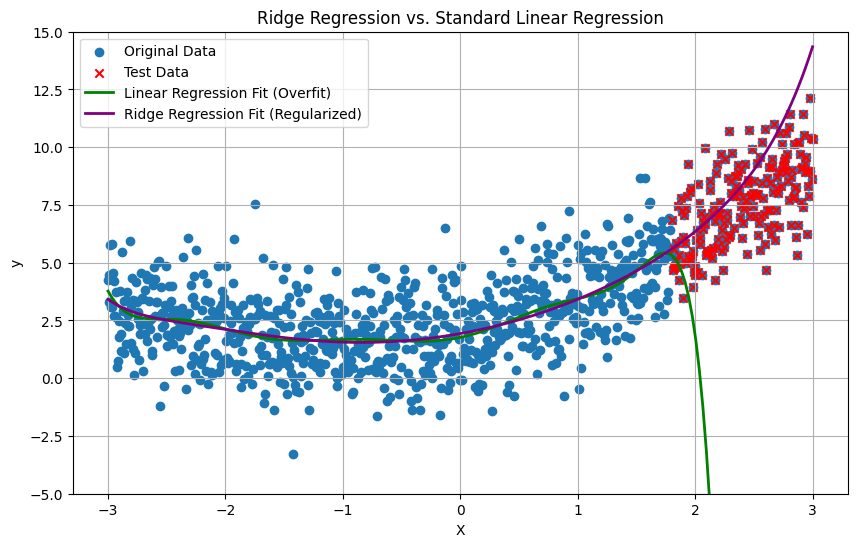

In [ ]:
# 8. Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Original Data')
plt.scatter(X_test, y_test, color='red', label='Test Data', marker='x')

# To plot the lines correctly, we must apply the same
# transformations to the plotting data as we did for the models.
X_plot = np.linspace(-3, 3, 200).reshape(-1, 1)
X_plot_poly = poly_features.transform(X_plot)
X_plot_scaled = scaler.transform(X_plot_poly)

y_linear_plot = linear_reg_model.predict(X_plot_scaled)
y_ridge_plot = ridge_reg_model.predict(X_plot_scaled)

plt.plot(X_plot, y_linear_plot, color='green', label='Linear Regression Fit (Overfit)', linewidth=2)
plt.plot(X_plot, y_ridge_plot, color='purple', label='Ridge Regression Fit (Regularized)', linewidth=2)

plt.title('Ridge Regression vs. Standard Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.ylim(-5, 15)
plt.legend()
plt.grid(True)
plt.show()

# Lasso (L1)

In [ ]:
#1. Lasso Regression
# The 'alpha' parameter controls the regularization strength. A higher
# alpha will push more coefficients to exactly zero.
# We also increase max_iter to ensure convergence.
lasso_reg_model = Lasso(alpha=0.1, max_iter=10000)
lasso_reg_model.fit(X_train_scaled, y_train)

Lasso(alpha=0.1, max_iter=10000)

In [ ]:
# 2. Make predictions and evaluate performance
y_lasso_pred = lasso_reg_model.predict(X_test_scaled)

#check mse
lasso_mse = mean_squared_error(y_test, y_lasso_pred)

print("Standard Linear Regression MSE: {:.2f}".format(linear_mse))
print("Lasso Regression MSE: {:.2f}".format(lasso_mse))
print("-" * 50)

Standard Linear Regression MSE: 78972.50
Lasso Regression MSE: 4.38
--------------------------------------------------


In [ ]:
# 3. Compare coefficients
print("Coefficients from Standard Linear Regression:")
print(np.round(linear_reg_model.coef_, 2))
print("\nCoefficients from Lasso Regression (some are exactly zero):")
print(np.round(lasso_reg_model.coef_, 2))
print("-" * 50)

Coefficients from Standard Linear Regression:
[[   1.49    4.44   -1.    -31.24  -12.3   104.25   91.53  -97.25 -144.65
   -45.27]]

Coefficients from Lasso Regression (some are exactly zero):
[ 1.03  0.83  0.    0.   -0.    0.   -0.    0.   -0.    0.  ]
--------------------------------------------------


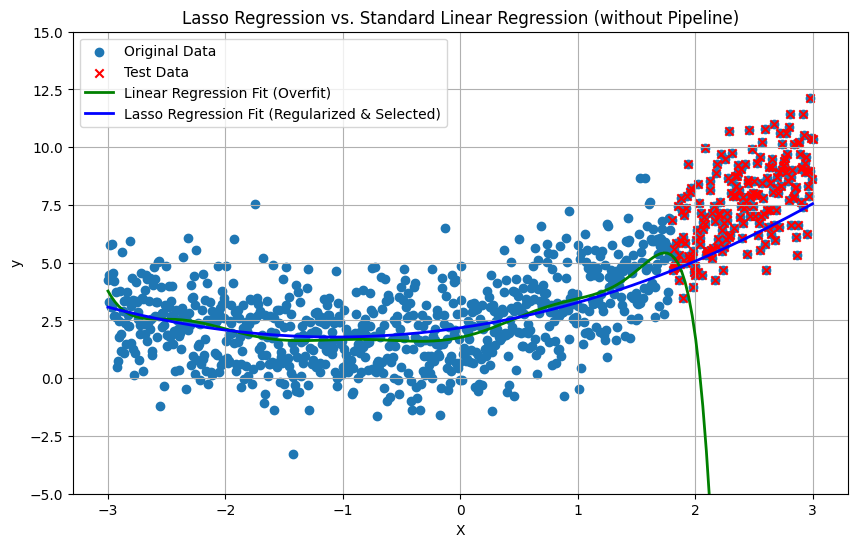

In [ ]:
# 4. Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Original Data')
plt.scatter(X_test, y_test, color='red', label='Test Data', marker='x')

# To plot the lines correctly, we must apply the same
# transformations to the plotting data as we did for the models.
X_plot = np.linspace(-3, 3, 200).reshape(-1, 1)
X_plot_poly = poly_features.transform(X_plot)
X_plot_scaled = scaler.transform(X_plot_poly)

y_linear_plot = linear_reg_model.predict(X_plot_scaled)
y_lasso_plot = lasso_reg_model.predict(X_plot_scaled)

plt.plot(X_plot, y_linear_plot, color='green', label='Linear Regression Fit (Overfit)', linewidth=2)
plt.plot(X_plot, y_lasso_plot, color='blue', label='Lasso Regression Fit (Regularized & Selected)', linewidth=2)

plt.title('Lasso Regression vs. Standard Linear Regression (without Pipeline)')
plt.xlabel('X')
plt.ylabel('y')
plt.ylim(-5, 15)
plt.legend()
plt.grid(True)
plt.show()

# Elastic Net

In [ ]:
#1 Elastic Net Regression
# We set two main hyperparameters:
# 'alpha': The overall strength of the penalty (L1 + L2).
# 'l1_ratio': The mix between L1 and L2. 0.5 means a 50/50 mix.
# We increase max_iter for convergence.
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000)
elastic_net_model.fit(X_train_scaled, y_train)

ElasticNet(alpha=0.1, max_iter=10000)

In [ ]:
# 2. Make predictions and evaluate performance
y_linear_pred = linear_reg_model.predict(X_test_scaled)
y_elastic_net_pred = elastic_net_model.predict(X_test_scaled)

linear_mse = mean_squared_error(y_test, y_linear_pred)
elastic_net_mse = mean_squared_error(y_test, y_elastic_net_pred)

print("Standard Linear Regression MSE: {:.2f}".format(linear_mse))
print("Elastic Net Regression MSE: {:.2f}".format(elastic_net_mse))
print("-" * 50)

Standard Linear Regression MSE: 78972.50
Elastic Net Regression MSE: 4.24
--------------------------------------------------


In [ ]:
# 3. Compare coefficients
print("Coefficients from Standard Linear Regression:")
print(np.round(linear_reg_model.coef_, 2))
print("\nCoefficients from Elastic Net Regression:")
print(np.round(elastic_net_model.coef_, 2))
print("-" * 50)

Coefficients from Standard Linear Regression:
[[   1.49    4.44   -1.    -31.24  -12.3   104.25   91.53  -97.25 -144.65
   -45.27]]

Coefficients from Elastic Net Regression:
[ 1.04  0.83  0.    0.02 -0.    0.   -0.    0.   -0.    0.  ]
--------------------------------------------------


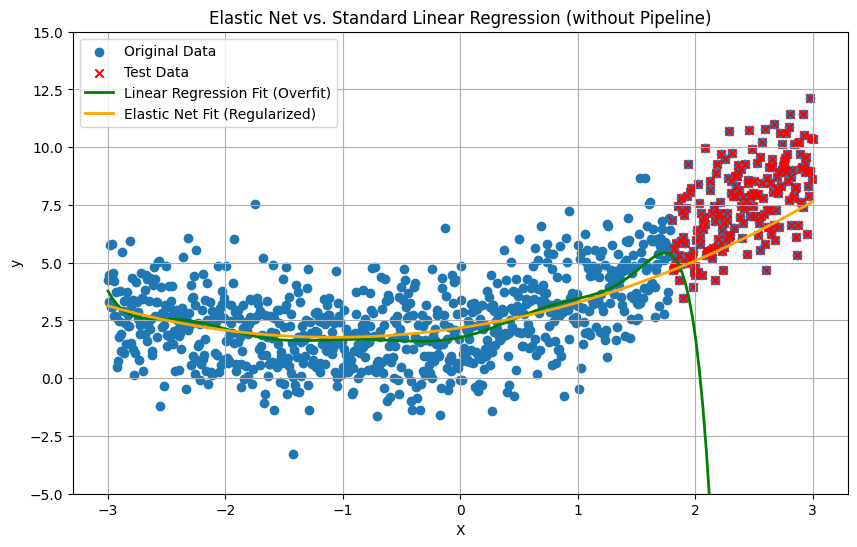

In [ ]:
# 3. Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Original Data')
plt.scatter(X_test, y_test, color='red', label='Test Data', marker='x')

# To plot the lines correctly, we must apply the same
# transformations to the plotting data as we did for the models.
X_plot = np.linspace(-3, 3, 200).reshape(-1, 1)
X_plot_poly = poly_features.transform(X_plot)
X_plot_scaled = scaler.transform(X_plot_poly)

y_linear_plot = linear_reg_model.predict(X_plot_scaled)
y_elastic_net_plot = elastic_net_model.predict(X_plot_scaled)

plt.plot(X_plot, y_linear_plot, color='green', label='Linear Regression Fit (Overfit)', linewidth=2)
plt.plot(X_plot, y_elastic_net_plot, color='orange', label='Elastic Net Fit (Regularized)', linewidth=2)

plt.title('Elastic Net vs. Standard Linear Regression (without Pipeline)')
plt.xlabel('X')
plt.ylabel('y')
plt.ylim(-5, 15)
plt.legend()
plt.grid(True)
plt.show()